Fatima Abdoun, Serena Bou Chaaya, Valentine Wien, Victoire Ollari 

In [5]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Cost functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

* Each **row** of X corresponds to **one data point (observation, sample)**.
* That is, row i contains the feature values of the i-th example.
* If there are n samples, X will have n rows.

#### 1.2 What are the columns of $\mathbf{X}$?

* Each column of X corresponds to one feature/variable across all data points.
* That is, column j contains the values of the j-th feature for every observation.
* If there are m features, X will have m columns.

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)?

We start from:

$$
y \approx X w_1 + w_0
$$


To rewrite this in the compact form

$$
y \approx \tilde{X} W
$$

we **augment $X$** with an additional column of ones.

That is:

$$
\tilde{X} =
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,d}
\end{bmatrix}
$$

and

$$
W =
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_d
\end{bmatrix}
$$
This can be proved : 
We start with the augmented forms:

$$
\tilde{X} = \begin{bmatrix} \mathbf{1} & X \end{bmatrix}, 
\qquad
W = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix},
$$

where  
- $\mathbf{1} \in \mathbb{R}^{n \times 1}$ is a column of ones,  
- $X \in \mathbb{R}^{n \times d}$ is the feature matrix,  
- $w_0 \in \mathbb{R}$ is the scalar bias,  
- $w_1 \in \mathbb{R}^{d \times 1}$ is the weight vector.  


***Matrix multiplication***:

$$
\tilde{X} W 
= 
\begin{bmatrix} \mathbf{1} & X \end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}
= \mathbf{1} w_0 + X w_1
$$



***Interpretation***:

- $\mathbf{1} w_0 = w_0 \mathbf{1}$ is just an $n$-vector with every entry equal to $w_0$.  
- So:

$$
\tilde{X} W = X w_1 + w_0 \mathbf{1}.
$$


***Component-wise (for sample $i$)***:

$$
(\tilde{X} W)_i = w_0 \cdot 1 + \sum_{j=1}^{d} x_{ij} w_{1,j}
= w_0 + (X w_1)_i
$$

This is exactly the original expression:

$$
X w_1 + w_0.
$$

- Original $X$:
  - Shape: $(n \times d)$  
  - $n =$ number of samples (rows)  
  - $d =$ number of features (columns)  

- Augmented $\tilde{X}$:
  - Shape: $(n \times (d+1))$  
  - Same number of rows (still one per sample).  
  - One extra column (the bias column of ones).  

- Weight vector $W$:
  - Shape: $((d+1) \times 1)$, holding both intercept $w_0$ and feature weights.  

- $\tilde{X}$ is the original design matrix $X$ **with an extra first column of ones**.  
- Its shape changes from $(n \times d)$ to $(n \times (d+1))$.  


For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.4 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$

In [6]:
def mean_squared_error(error_vector):
    mean_squared_error = np.mean(error_vector**2)
    return mean_squared_error

In [7]:
mean_squared_error(np.array([0,0,0]))

0.0

In [8]:
def mean_absolute_error(error_vector):
    mean_absolute_error = np.mean(np.abs(error_vector))
    return mean_absolute_error

In [9]:
mean_absolute_error([1,1,1])

1.0

Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.5 What is the shape of these cost functions as a function of the error

In [10]:
x_axis = np.linspace(-10,10,100) 
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

Text(0, 0.5, 'cost function')

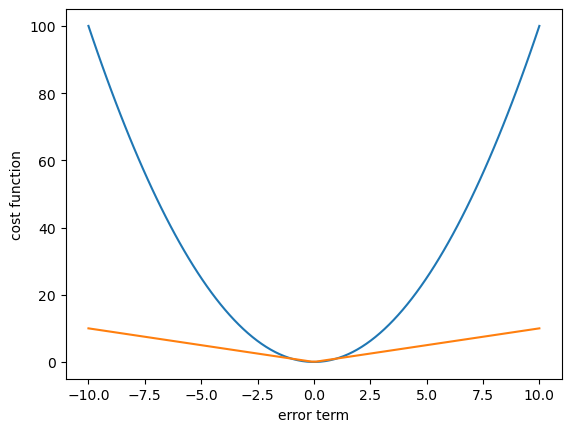

In [11]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

***Cost Functions in Linear Regression***

In linear regression, we use a *cost function* to measure how far the model’s predictions are from the true values. Two common choices are the *Mean Squared Error (MSE)* and the *Mean Absolute Error (MAE)*.

The plot above shows the cost functions evaluated on a range of possible error values from (-10) to (10):

* *Blue curve = MSE ($x^2$)*
* *Orange curve = MAE ($|x|$)*

***Interpretation of the curves***

* **Blue curve (MSE):**

  * A parabola opening upwards.
  * Cost increases *quadratically* as the error grows.
  * This means *large errors are penalized much more heavily* than small errors.

* **Orange curve (MAE):**

  * A straight “V”-shaped line.
  * Cost increases *linearly* with the error.
  * This means *all errors are treated proportionally*, making MAE more robust to outliers.

***Summary***

* The *blue parabola* represents the *Mean Squared Error (MSE)*.
* The *orange V-shape* represents the *Mean Absolute Error (MAE)*.
* MSE punishes large errors more severely, while MAE gives a fairer weight to all errors.



#### 1.6  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? What implications does this have for gradient based optimization like gradient descent?

***Differentiability of the two losses***

* *MSE (Mean Squared Error):*

$$
\text{MSE}(\epsilon) = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2
$$

* Differentiable everywhere (smooth parabola).
* Derivative:
  $$
  \frac{\partial \text{MSE}}{\partial \epsilon_i} = \frac{2}{N}\epsilon_i
  $$

This makes MSE very friendly for gradient-based optimization methods.

* *MAE (Mean Absolute Error):*

$$
\text{MAE}(\epsilon) = \frac{1}{N}\sum_{i=1}^N |\epsilon_i|
$$

* Differentiable everywhere *except at** $\epsilon_i = 0$ (the “corner” of the V).
* Gradient:

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} = \frac{1}{N}, \quad \epsilon_i > 0
$$

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} = -\frac{1}{N}, \quad \epsilon_i < 0
$$

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} \text{ is undefined } , \quad \epsilon_i = 0
$$


⚠️ At $\epsilon_i = 0$, the gradient is not defined. 

***1. Optimization in machine learning***

When we train a model (like linear regression or neural networks), we want to find the *best parameters* (weights (w)) that minimize a *loss function* (e.g., MSE, MAE).

* Optimization = process of finding the minimum of the loss function.
* The “landscape” of the loss function can be visualized like a surface or curve.

***2. What is the **gradient**?***

* The *gradient* is a vector of partial derivatives of the loss function with respect to the parameters.
* Intuitively: it points in the direction of *steepest increase*.
* If we want to minimize, we go in the *opposite direction* of the gradient.


***3. Why gradients matter***

* If the loss is smooth (like **MSE**), gradients are well-defined everywhere → optimization is straightforward.
* If the loss has corners (like **MAE**), gradients may not exist everywhere → we use *subgradients*, and optimization may be slower or trickier.

* **MSE:**

  * Smooth and differentiable → gradient descent has a clear direction everywhere.
  * Leads to stable and efficient optimization.

* **MAE:**

  * Non-differentiable at $\epsilon = 0$.
  * Gradient descent still works, but requires **subgradient methods** or special handling.
  * Convergence can be slower or less stable.

* **MSE is differentiable everywhere**, so gradient descent works smoothly.
* **MAE is not differentiable at zero**, which complicates gradient-based optimization.
  In practice, optimizers can still handle this using subgradients, but training may be less stable and slower compared to MSE.

#### 1. Which loss function is more sensitive to outliers and why?

1. **MSE squares the error terms**:
   $$
   \text{MSE} = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2
   $$

   * If one data point has a very large error (an outlier), squaring it makes it disproportionately larger than the rest.
   * Example:

     * Normal error = 2 → squared = 4
     * Outlier error = 20 → squared = 400 
   * That one outlier can dominate the cost.

2. **MAE grows linearly with error**:
   $$
   \text{MAE} = \frac{1}{N}\sum_{i=1}^N |\epsilon_i|
   $$

   * Outliers only contribute proportionally to their magnitude.
   * So the influence of a large error is not exaggerated compared to small errors.

***Summary***

* **MSE** → **more sensitive** to outliers, because squaring amplifies large errors.
* **MAE** → more **robust** to outliers, since it treats all errors linearly.


# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution

The system
$$
\mathbf{X}\mathbf{w} = \mathbf{y}
$$
has **one unique solution** when:

* $(\mathbf{X})$ is a **square matrix** ((n = d)), and
* its columns are linearly independent → (\det(\mathbf{X}) \neq 0).

In that case,
$$
\mathbf{w} = \mathbf{X}^{-1}\mathbf{y}
$$

Geometrically:

Each equation is a line/plane. All of them intersect at exactly one point.
Example in 2D: two non-parallel lines crossing at one point.
Therefore in 2D when two lines cross at a single point → one solution

#### 2.2 No solution

The system has **no solution** when it is **overdetermined** (n > d), more equations than unknowns and $(\mathbf{y})$ does not lie in the column space of $(\mathbf{X})$.

* In regression, this is the usual case → we use **least squares** instead of exact solution.

Geometrically : 

Equations are inconsistent — they “miss” each other.
Example in 2D: two parallel lines with different intercepts → they never meet.
In higher dimensions: planes that don’t intersect at a common point.
Thereofore in 2D for example parallel lines (no intersection) → no solution

#### 2.3 An infinite number of solutions

The system has **infinitely many solutions** when it is **underdetermined** n < d, more unknowns than equations.

* With linearly independent columns, any $(\mathbf{y})$ in the column space can be matched by infinitely many $(\mathbf{w})$.
* This happens because there are “free variables” in the solution.

Geometrically : 

More unknowns than equations → we have “free variables.”
Example in 2D: one line equation describes infinitely many solutions along that line.
Example in 3D: two planes intersect in a line → infinitely many points on that line.
Therefore in 2D 2 lines that overlap completely → infinitely many solutions


#### 2.4 Give a geometrical interpretation of the matrix Rank (10 bonus point if you use the Manim package)


***1. Rank as “dimension of the span”***

* Each column of a matrix can be seen as a **vector** in space.
* The **rank** tells us the **dimension of the space spanned** by those vectors (i.e., how many independent directions they cover).


**Rank 1 (line)**

All columns lie on the same line.

Example in 2D:
$$
\begin{bmatrix}
1 & 2 \\
2 & 4
\end{bmatrix}
$$

Both columns point in the same direction → they span only a **1D line** through the origin.


**Rank 2 (plane in 3D, or full 2D space)**

Columns span an entire **plane** (in 3D) or the whole **2D plane**.

Example in 2D:
$$
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

These two vectors (the unit axes) span all of $(\mathbb{R}^2)$.

**Rank 3 (space)**

In 3D, if you have 3 independent columns, they span the whole **3D space**.

Example:
$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$
The three standard basis vectors span all of $(\mathbb{R}^3)$.

***2. Visual intuition***

* **Rank = 1** → all vectors are collinear (span = a line).
* **Rank = 2** → vectors are not collinear, but lie in a plane.
* **Rank = 3** → vectors point in 3 independent directions (they fill 3D space).
* In general, **rank = dimension of the “flat” (line, plane, hyperplane, …) spanned by the columns**.

#### 2.5 In general, why can't we solve the linear equation using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

In regression we have

$$
\mathbf{y} = \tilde{\mathbf{X}} \mathbf{w}
$$

and we’d like to “solve for” (\mathbf{w}).
Naively, one might think:

$$
\mathbf{w} = \tilde{\mathbf{X}}^{-1} \mathbf{y}
$$

But this is **not generally possible**.

1. **$\tilde{\mathbf{X}}$ is not square in general**

* $\tilde{\mathbf{X}} \in \mathbb{R}^{n \times (d+1)}$
* Usually, (n) (number of data points) is **much larger** than (d) (number of features).
* That makes $\tilde{\mathbf{X}}$ a **tall rectangular matrix**, which cannot be inverted.
* Only square full-rank matrices have a true inverse.

2. **Even if square, may not be invertible**

* If the columns are linearly dependent (not full rank), $\det(\tilde{\mathbf{X}})=0$.
* Then $\tilde{\mathbf{X}}^{-1}$ does not exist.


3. **In practice, the system may not have an exact solution**

* Often $\mathbf{y}$ does not lie exactly in the column space of $\tilde{\mathbf{X}}$.
* So $\tilde{\mathbf{X}}\mathbf{w} = \mathbf{y}$ might have **no exact solution**.

We cannot solve using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\mathbf{w}$ because $\tilde{\mathbf{X}}$ is usually **not square** (more rows than columns) and thus not invertible. Even when square, it may not be full rank, and in general $\mathbf{y}$ may not lie in the column space of $\tilde{\mathbf{X}}$.

The bonus can be found in the script.py file

#### 2.6 Differentiate above formula step by step and show what will we have?

First we develop the least squares expression : 


$$
(y - \bar{X} w)^T (y - \bar{X} w)
$$

$$
= (y^T - w^T \bar{X}^T)(y - \bar{X} w)
$$

$$
= y^T y - y^T \bar{X} w - w^T \bar{X}^T y + w^T \bar{X}^T \bar{X} w
$$

But we know that $\bar{X}$ is a matrix, so multiplied by a vector this yields a vector. A vector multiplied by a vector of transposed dimensions yields a scalar. 
Fruther more we know that for a scalar this expression is valid : $c = c^T = c$ 

So we apply a transposed on the scalar resulting in the simplification of the expression : 

$$
y^T y - w^T \bar{X}^T y - y^T \bar{X} w + w^T \bar{X}^T \bar{X} w
$$

$$
= y^T y - 2 w^T \bar{X}^T y + w^T \bar{X}^T \bar{X} w
$$



Now, we compute the derivative with respect to $w$:

First it can be seen that $y^T y$ so it's derivative accoridng to w is automatically nul. 

$$
\frac{\partial}{\partial w} \left( -2 w^T \bar{X}^T y + w^T \bar{X}^T \bar{X} w \right)
$$

We distribute the derivative across all parentheses; 

$$
= -2 \frac{\partial}{\partial w}(w^T \bar{X}^T y) + \frac{\partial}{\partial w}(w^T \bar{X}^T \bar{X} w)
$$

$-2 \bar{X}^T y$ is independent of w so this can be taken out of the derivative. Furthermore, the derivative of w transpose as a function  of w is simply an all-ones vector. This yields the following expression : 

$$
= -2 \bar{X}^T y + \frac{\partial}{\partial w}(w^T A w)
$$

where $A = \bar{X}^T \bar{X}$ is a symmetric matrix.

$$
\frac{\partial}{\partial w}(w^T A w) = 2 A w
$$

Thus the derivative of the least squares expression yields:

$$
-2 \bar{x}^T y + 2 A w
$$

This can be proven : 


For example with a 2 by 2 A matrix and a 2 by 1: (This can after be generalized for bigger matrices by expressing the matrices uner the form of sums)
$$
w = 
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix},
\quad
A = 
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}
$$

Then

$$
w^T A w =
\begin{pmatrix} w_1 & w_2 \end{pmatrix}
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}
$$

$$
= (w_1 A_{11} + w_2 A_{21}    \; w_1 A_{12} + w_2 A_{22})
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}
$$

$$
= w_1 (w_1 A_{11} + w_2 A_{21}) + w_2 (w_1 A_{12} + w_2 A_{22})
$$

$$
= w_1^2 A_{11} + w_1 w_2 A_{21} + w_2 w_1 A_{12} + w_2^2 A_{22}
$$

$$
= A_{11} w_1^2 + (A_{21} + A_{12}) w_1 w_2 + A_{22} w_2^2
$$


Now compute derivatives:

$$
\frac{\partial}{\partial w_1} = 2 w_1 A_{11} + A_{12} w_2 + A_{21} w_2
$$

$$
\frac{\partial}{\partial w_2} = 2 w_2 A_{22} + A_{21} w_1 + A_{12} w_1
$$

So the gradient is:

$$
\nabla = 
\begin{pmatrix}
\frac{\partial}{\partial w_1} \\
\frac{\partial}{\partial w_2}
\end{pmatrix}
=
\begin{pmatrix}
w_2 (A_{21} + A_{12}) + 2 w_1 A_{11} \\
w_1 (A_{12} + A_{21}) + 2 w_2 A_{22}
\end{pmatrix}
$$

And because by definiton of a symmetric matrix we equivalently have $A_21 = A_12$ : 

$$
\nabla = 
\begin{pmatrix}
\frac{\partial}{\partial w_1} \\
\frac{\partial}{\partial w_2}
\end{pmatrix}
=
\begin{pmatrix}
2 w_2 A_{21}  + 2 w_1 A_{11} \\
2 w_1 A_{21} + 2 w_2 A_{22}
\end{pmatrix}
$$

$$
=
2
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}
=
2 A w
$$

So at the end we do infact find the following expression for the differentiation of the least squares expression : 
$$
-2 \bar{X}^T y + 2 A w
$$

$$
= -2 \bar{X}^T y + 2 \bar{X}^T \bar{X} w


#### 2.7 if we want $\| y - \tilde{X} w \|_2^2$ to be minimum, what should the derivative be equal to?

Now setting the gradient to zero:

$$
-2 \bar{X}^T y + 2 A w = 0
$$

$$
2 \bar{X}^T y = 2 A w
$$

$$
A w = \bar{X}^T y
$$

$$
w = A^{-1} \bar{X}^T y
$$

But recall $A = \bar{X}^T \bar{X}$, hence:

$$
w = (\bar{X}^T \bar{X})^{-1} \bar{X}^T y
$$



#### 2.8 What is the Hat matrix and what does its diagonal values correspond to?

The **hat matrix** is an important concept in linear regression. It's called the Hat matrix because it "puts a hat" on **y**, transforming the observed values **$y$** into the predicted values **$ŷ$**:

$$
\hat{y} = H y
$$

$$
\boxed{H = X (X^\top X)^{-1} X^\top}
$$

Where:
- X is the matrix of explanatory variables (including the intercept)
- Y is the vector of observed values
- H is the hat matrix
- $\hat{y}$ are the predicted values


***Key Properties***

- H is a **square matrix** of size n $×$ n (n = number of observations)
- It depends only on $X$, not on $Y$
- It is **symmetric** $H = H^\top$ and **idempotent** $H^2 = H$
- The **trace** of $H$ equals the number of parameters $p$:

$$
\text{trace}(H) = p
$$


***Diagonal Elements***

The diagonal elements $h_{ii}$ are called **leverage values**:

$$
\boxed{h_{ii} = x_i^\top (X^\top X)^{-1} x_i}
$$

- They measure **how much an observation has the potential to influence its own fitted value**.
- $0 \leq h_{ii} \leq 1$.
- The sum of all leverage values equals the number of parameters $p$.
- The **average leverage** is:

$$
\bar{h}_{ii} = \frac{p}{n}
$$

- A large $h_{ii}$ (e.g., $> 2 \times \bar{h}_{ii}$) means the observation has **high leverage** (potential for influence).


***Leverage vs. Influence***

**Important distinction:**
- **High leverage** ($h_{ii}$) means an observation has the potential to be influential
- **Actual influence** depends on both leverage AND the residual

An observation with high leverage but a small residual may not actually be very influential. True influence is better measured by metrics like **Cook's distance**, which combines leverage with residuals:

$$
D_i = \frac{e_i^2}{p \cdot MSE} \cdot \frac{h_{ii}}{(1-h_{ii})^2}
$$


***Connection to Residuals***

Observations with high leverage have **smaller residual variance**:

$$
\text{Var}(\hat{\epsilon}_i) = \sigma^2(1 - h_{ii})
$$

This means high-leverage points are fitted more closely by the model.


***Simple Linear Regression Example***

For a simple regression with one predictor:

$$
h_{ii} = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum (x_j - \bar{x})^2}
$$

- Points far from the mean have high leverage.
- The furthest points from $\bar{x}$ have the most potential to influence the regression line.


***Off-Diagonal Elements***

While the diagonal elements are most important, the **off-diagonal elements** $h_{ij}$ also have meaning:
- They measure how observation $j$ influences the fitted value at observation $i$
- Generally less used in practice than diagonal elements


***Why It Matters***

- The hat matrix shows how much each observation **potentially influences** its prediction.
- Large diagonal values indicate points with **high leverage** (potential for influence).
- Combined with residual analysis, it's very useful for **regression diagnostics** and **detecting outliers or influential data points**.
- For actual influence assessment, use **Cook's distance** or other influence measures that combine leverage with residuals.

#### 2.9 What is William’s plot and how does it help in outlier detection?


William's plot  is a diagnostic plot used in linear regression to simultaneously identify **outliers** and **high-leverage points**.



##### ***Definition***

William's plot displays:
- **X-axis**: Leverage values ($h_{ii}$) - diagonal elements of the hat matrix
- **Y-axis**: Standardized residuals

$$
r_i^{std} = \frac{e_i}{\hat{\sigma}\sqrt{1-h_{ii}}}
$$

Where:
- $e_i$ is the residual for observation $i$
- $h_{ii}$ is the leverage for observation $i$
- $\hat{\sigma}$ is the estimated standard deviation of residuals


##### ***Visual Structure***

The plot typically includes reference lines that divide it into regions:

Vertical Lines (Leverage Thresholds)
- **Low leverage threshold**: Often at $h_{ii} = \frac{p}{n}$ (average leverage)
- **High leverage threshold**: Commonly at $h_{ii} = \frac{2p}{n}$ or $\frac{3p}{n}$

Where $p$ is the number of parameters and $n$ is the number of observations.

Horizontal Lines (Residual Thresholds)
- Typically at $\pm 2$ or $\pm 3$ standard deviations
- These identify observations with unusually large residuals


##### ***Four Quadrants Interpretation***

William's plot divides observations into four categories:

 1. **Low Leverage, Low Residual** (bottom-left)
-  **Good observations**
- No cause for concern
- These points fit the model well and don't have unusual predictor values

 2. **High Leverage, Low Residual** (bottom-right)
-  **Leverage points**
- Unusual predictor values (far from the mean)
- BUT they fit the model well (small residuals)
- These points can stabilize the regression but need monitoring

 3. **Low Leverage, High Residual** (top-left)
-  **Outliers**
- Typical predictor values
- BUT don't fit the model well (large residuals)
- Limited influence on the regression line due to low leverage

 4. **High Leverage, High Residual** (top-right)
-  **Influential outliers** (most problematic)
- Unusual predictor values AND don't fit the model
- These observations can dramatically affect the regression
- Should be investigated carefully - potential data errors or special cases



##### ***Why It's Useful for Outlier Detection***

 1. **Simultaneous Diagnosis**
- Identifies different types of problematic observations in one plot
- Separates outliers (high residual) from leverage points (unusual X values)

 2. **Influence Assessment**
- Points in the top-right are the most concerning - they combine both issues
- These have the highest **Cook's distance** values

 3. **Easy Visual Interpretation**
- Quick identification of observations that need investigation
- Clear boundaries help determine what's "unusual"

 4. **Complements Other Diagnostics**
- Works well with Cook's distance and DFFITS
- Provides spatial context that single metrics can't



##### ***Connection to Cook's Distance***

Observations in the **top-right quadrant** (high leverage + high residual) will have large **Cook's distance**:

$$
D_i = \frac{r_i^2}{p} \cdot \frac{h_{ii}}{(1-h_{ii})}
$$

This is because Cook's distance combines both components that William's plot displays separately.




##### ***Limitations***

- **Thresholds are somewhat arbitrary** - rules like $2p/n$ are guidelines, not strict rules
- **Doesn't account for multiple outliers** masking each other



#### 2.10 What happens if some columns are linearly dependent? What is the connection to feature selection?

Columns are linearly dependent if one column can be written as a linear combination of others:
$$
x_j = a_1 x_1 + a_2 x_2 + ... + a_k x_k
$$
When columns in the design matrix **X** are **linearly dependent**, it creates a problem called **multicollinearity** 

##### ***Mathematical Problem***
In linear regression, we estimate coefficients using:
$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$
**If columns are linearly dependent**, then:
- The matrix $X^\top X$ becomes **singular** (non-invertible)
- Its determinant is zero: $\det(X^\top X) = 0$
- The inverse $(X^\top X)^{-1}$ **does not exist**

This can be understood through the **rank perspective**: when $\text{rank}(X) < p$ (where $p$ is the number of features), the matrix $X^\top X$ becomes singular. Even though we may have $\text{rank}(X) = \text{rank}([X|y])$, this means infinitely many solutions exist for $\hat{\beta}$.

##### ***Consequences***
-  **No unique solution** : The model has infinitely many sets of coefficients giving the same predictions.  
-  **Computational issues** : Software may fail, drop variables, return `NaN`, or warn about singularity.  
-  **Interpretation problems** : Coefficients cannot be interpreted individually; the model is not identifiable.

##### ***High Multicollinearity*** 
Even when columns are **not perfectly** linearly dependent, **high correlation** causes problems:

##### ***Effects:***
- $(X^\top X)$ is invertible but **ill-conditioned**
- **Unstable coefficients**: small changes in data cause large coefficient changes
- **Large standard errors**: coefficients become statistically insignificant
- **High variance inflation factors (VIF)**:
$$
\text{VIF}_j = \frac{1}{1 - R_j^2}
$$
Where $R_j^2$ is the R² from regressing $x_j$ on all other predictors.

**Rule of thumb**: VIF > 10 indicates problematic multicollinearity

**Feature selection** is closely related to **linear dependence** and **multicollinearity** in regression.

#####  ***Why they are connected***
When some features are **highly correlated**:
- The model struggles to separate their individual effects.  
- Coefficients become **unstable**.  
- The model is less reliable and harder to interpret.

On real datasets, the columns might not be linearly independent. When they aren't, this has critical implications for the solution of $y \approx X\hat{\beta}$: multiple coefficient vectors can produce the same predictions, making the solution non-unique and unreliable.

 **Feature selection** helps by **removing redundant features**, which **reduces multicollinearity** 

#####  ***What feature selection does***
- Removes dependent features to avoid **singularity** (ensures $\text{rank}(X) = p$, so that $(X^\top X)^{-1}$ is invertible)  
- Reduces multicollinearity → more stable coefficients  
- Simplifies the model → better interpretation and performance

#####  ***Common methods***
- **Filter methods**:  
  - Remove features with very high correlation (e.g., > 0.9) or High Variance Inflation Factor (VIF) (> 10).
- **Wrapper methods**:  
  - Add or remove features step by step based on model performance.
- **Regularization**:  
  - The model automatically selects or shrinks features to handle multicollinearity.

#### 2.11 What will be the new cost function after adding the regularization term?

In ordinary least squares, the cost function to minimize is:

$$
J(w) = \| y - \tilde{X}w \|_2^2 = (y - \tilde{X}w)^T (y - \tilde{X}w)
$$

When we add the regularization term, the new cost function becomes:

$$
\boxed{
J(w) = \| y - \tilde{X}w \|_2^2 + \lambda \| w \|_2^2
}
$$

or equivalently,

$$
J(w) = (y - \tilde{X}w)^T (y - \tilde{X}w) + \lambda w^T w
$$

where:

- $\,\lambda \ge 0\,$ is the **regularization parameter** controlling the penalty strength,  
- $\,\|w\|_2^2 = \sum_{j=1}^{d} w_j^2\,$ penalizes large weight values,  
- The second term prevents overfitting and ensures numerical stability by keeping $\,(\tilde{X}^\top \tilde{X} + \lambda I)\,$ always invertible.




#### 2.12 What will be the new 𝑤 when we differentiate the new cost function and set it to zero.

We start from the regularized cost function:
$$
J(\mathbf{w}) \;=\; \|\,\mathbf{y}-\tilde{X}\mathbf{w}\,\|_2^2 \;+\; \lambda \|\mathbf{w}\|_2^2
\;=\; (\mathbf{y}-\tilde{X}\mathbf{w})^\top(\mathbf{y}-\tilde{X}\mathbf{w}) \;+\; \lambda \,\mathbf{w}^\top\mathbf{w}.
$$

**1) Expand the quadratic form**
$$
\begin{aligned}
J(\mathbf{w})
&= \mathbf{y}^\top\mathbf{y} \;-\; 2\,\mathbf{w}^\top \tilde{X}^\top \mathbf{y}
\;+\; \mathbf{w}^\top \tilde{X}^\top \tilde{X}\,\mathbf{w}
\;+\; \lambda\, \mathbf{w}^\top\mathbf{w}.
\end{aligned}
$$

**2) Take the gradient w.r.t. $\mathbf{w}$** (using $\nabla_{\mathbf{w}}(\mathbf{w}^\top A \mathbf{w})=(A+A^\top)\mathbf{w}$ and $\tilde{X}^\top\tilde{X}$ is symmetric):
$$
\nabla_{\mathbf{w}} J(\mathbf{w}) \;=\; -2\,\tilde{X}^\top \mathbf{y}
\;+\; 2\,\tilde{X}^\top \tilde{X}\,\mathbf{w}
\;+\; 2\,\lambda\,\mathbf{w}.
$$

**3) Set the gradient to zero and rearrange**
$$
-2\,\tilde{X}^\top \mathbf{y} + 2\,\tilde{X}^\top \tilde{X}\,\mathbf{w} + 2\,\lambda\,\mathbf{w} \;=\; \mathbf{0}
\;\;\Longrightarrow\;\;
(\tilde{X}^\top \tilde{X} + \lambda I)\,\mathbf{w} \;=\; \tilde{X}^\top \mathbf{y}.
$$

**4) Solve for $\mathbf{w}$** (for $\lambda>0$, the matrix is positive definite and invertible):
$$
\boxed{\;
\mathbf{w}_{\text{ridge}}
\;=\;
(\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\,\tilde{X}^\top \mathbf{y}
\;}
$$


#### 2.13 Prove that the part of Hat matrix where we want to take the inverse from is always reversible after we introduce the regularization term.

**Goal.** Show that after adding regularization term, the matrix we need to invert,
$$(\tilde{X}^\top \tilde{X} + \lambda I),$$
is **invertible** for any $\lambda>0$. Consequently,
$$H_\lambda \;=\; \tilde{X}\,(\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\tilde{X}^\top$$
is well defined.

#### ***Proof via quadratic form***

Take any non-zero vector $\mathbf{v}\in\mathbb{R}^{d+1}$. Consider the quadratic form:
$$
\mathbf{v}^\top(\tilde{X}^\top \tilde{X} + \lambda I)\,\mathbf{v}
\;=\; \underbrace{\mathbf{v}^\top \tilde{X}^\top \tilde{X}\,\mathbf{v}}_{\;=\;\|\tilde{X}\mathbf{v}\|_2^2\;\ge 0}
\;+\;
\underbrace{\lambda\,\mathbf{v}^\top \mathbf{v}}_{\;=\;\lambda\|\mathbf{v}\|_2^2\;>\;0\text{ for }\mathbf{v}\neq 0}.
$$

Hence,
$$
\mathbf{v}^\top(\tilde{X}^\top \tilde{X} + \lambda I)\,\mathbf{v}
= \|\tilde{X}\mathbf{v}\|_2^2 + \lambda\|\mathbf{v}\|_2^2 \;>\; 0
\quad\text{for all } \mathbf{v}\neq 0 \text{ when } \lambda>0.
$$

Therefore $(\tilde{X}^\top \tilde{X} + \lambda I)$ is **symmetric positive definite (SPD)**.  
An SPD matrix has **all positive eigenvalues** and is **invertible**. $\square$


#### ***Equivalent eigenvalue argument (spectral shift)***

Let $\tilde{X}^\top \tilde{X} = Q \Lambda Q^\top$ with $\Lambda=\mathrm{diag}(\sigma_1^2,\ldots,\sigma_{d+1}^2)$, $\sigma_i^2\ge 0$.
Then
$$
\tilde{X}^\top \tilde{X} + \lambda I
= Q(\Lambda+\lambda I)Q^\top,
$$
whose eigenvalues are $(\sigma_i^2+\lambda) \ge \lambda > 0$.  
All eigenvalues are strictly positive $\Rightarrow$ the matrix is invertible. $\square$


#### ***Conclusion***

Because $(\tilde{X}^\top \tilde{X} + \lambda I)$ is invertible for any $\lambda>0$, the solution
$$
\mathbf{w} = (\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\tilde{X}^\top \mathbf{y}
$$
and the associated matrix
$$
H_\lambda = \tilde{X}(\tilde{X}^\top \tilde{X} + \lambda I)^{-1}\tilde{X}^\top
$$
are always well defined. This is the precise sense in which regularization makes “the part we invert” in the Hat matrix *always reversible*.


#### 2.14  What is the shape of the parabola as a function of $a$?

In [12]:
def parabola(x, a = 1): 
    return a * x ** 2

In [13]:
x_axis_parabola = np.linspace(-10, 10, 100)

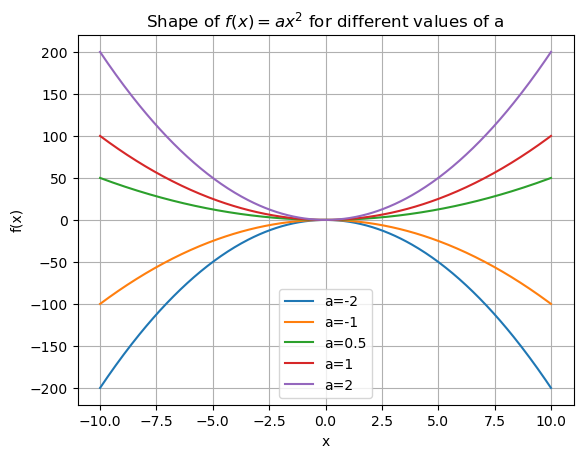

In [14]:
x = np.linspace(-10, 10, 400)
for a in [-2, -1, 0.5, 1, 2]:
    plt.plot(x, a*x**2, label=f'a={a}')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Shape of $f(x)=a x^2$ for different values of a')
plt.grid(True)
plt.show()


The parabola is defined as $f(x)=a\,x^2$.  
The coefficient $a$ determines both the orientation and width of the parabola:

- If $a>0$, the parabola opens upwards (∪-shape).  
- If $a<0$, it opens downwards (∩-shape).  
- The magnitude** of $a$ controls the curvature:  
  - Larger $|a|$ → narrower parabola (steeper).  
  - Smaller $|a|$ → wider parabola (flatter).

Hence, $a$ acts as a scaling factor on how strongly $x^2$ grows, modifying both the direction and the steepness of the parabola.


#### 2.15 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [15]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [16]:
X_test = np.linspace(0, 1, 100) 

In [17]:
n_samples = 10 
degrees = [1, 2, 16] 
X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 

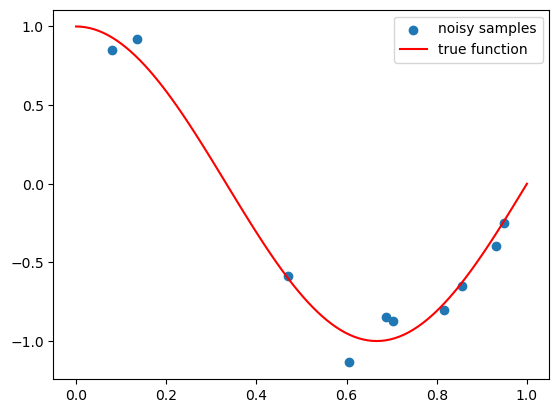

In [18]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**Graph 1 – True Function and Noisy Samples**

The first graph represents the true underlying function $f(x) = \cos(1.5 \pi x)$, drawn in red, together with ten noisy observations shown as blue dots. This plot is purely descriptive, it defines the problem we are trying to solve. The noise simulates the kind of variability we typically encounter in real data, where measurements deviate slightly from the theoretical curve. Because the dataset is small and unevenly spaced, it poses a realistic challenge for regression models: they must extract the general trend from few and imperfect examples. The red curve serves as the ground truth, while the scattered blue points illustrate how a learning algorithm must balance fitting the data without simply memorizing it.





The following code will fit a polynomial regression, you need to fill the degree

In [19]:
polynomial_features = PolynomialFeatures(degree=1, 
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

To plot the result, you can use the following code

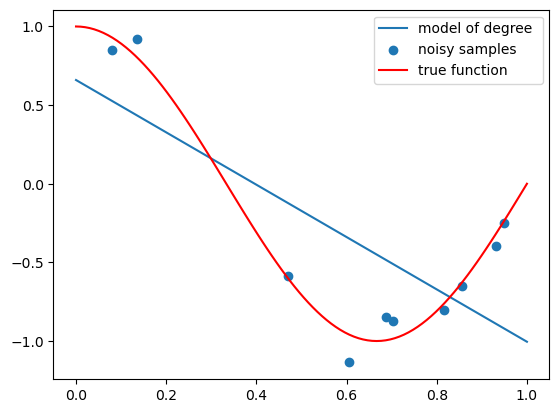

In [20]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**Graph 2 – Polynomial Regression of Degree 1 (Linear Model)**

In the second graph, the blue line shows a **degree 1 polynomial fit**, which corresponds to ordinary linear regression. The model tries to explain the data using only a straight line. Visually, the line cuts diagonally across the data but completely fails to reproduce the curvature of the true cosine function. It clearly cannot follow the periodic pattern, especially near the turning points. This behavior illustrates **underfitting**: the model’s functional form is too simple to capture the non-linear relationship in the data. In statistical terms, it exhibits **high bias**, it systematically deviates from the true function even if we had more samples  and **low variance**, because it would produce roughly the same straight line no matter what small noise was added. The linear fit minimizes the mean-squared error on the limited data but lacks the expressive power to model the wave-like structure of the target.


In [21]:
polynomial_features = PolynomialFeatures(degree=2,  # ← change to 2 then 16 and re-run
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])

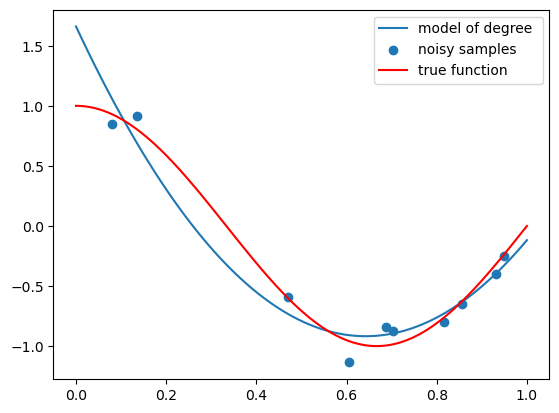

In [22]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**Graph 3 – Polynomial Regression of Degree 2**

The third plot increases the model complexity to a **degree 2 polynomial**. The blue curve now bends, producing a gentle parabola that approximates the general shape of the cosine segment much better than the straight line. This quadratic model manages to capture at least one main curvature of the function, reducing the bias that was visible in the linear case. However, it still cannot reproduce the smaller oscillations or the asymmetry near the edges, and the fit remains slightly too smooth. This illustrates a middle ground between underfitting and overfitting: the model has improved flexibility but still generalizes fairly stably with such few samples. In terms of bias–variance trade-off, the bias is lower than before, while the variance remains moderate. This kind of model often yields the lowest test error when the dataset is small, because it avoids excessive sensitivity to noise.

In [23]:
polynomial_features = PolynomialFeatures(degree=16,  # ← change to 2 then 16 and re-run
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=16, include_bias=False)),
                ('linear_regression', LinearRegression())])

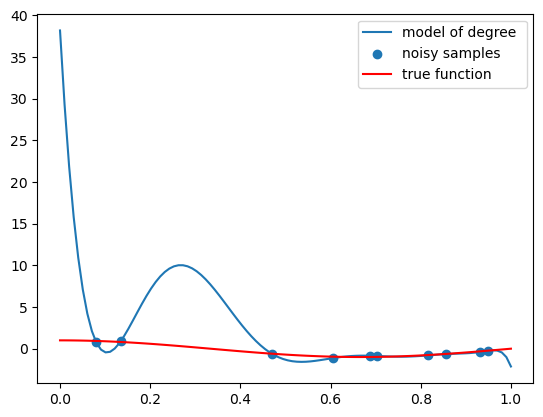

In [24]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**Graph 4 – Polynomial Regression of Degree 16 (No Regularization)**

In the fourth figure, the polynomial degree jumps to 16, giving the model extreme flexibility. The blue curve passes almost exactly through every training point, but between them it swings violently upward and downward. The y-axis now reaches values on the order of ($10^6$), which signals that the model has become numerically unstable. This is the textbook example of **overfitting** and **ill-conditioning** in high-degree polynomial regression. Each additional term ($x^k$) introduces correlated features, and the least-squares solution requires inverting a poorly conditioned matrix. Tiny numerical errors or small perturbations in the data cause enormous changes in the fitted coefficients. As a result, while the training error is nearly zero, the curve’s behavior between points is erratic and meaningless. The model has **very low bias but extremely high variance**, capturing the noise rather than the signal. This graph vividly demonstrates why regularization is essential when using high-degree polynomials.



Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

In [32]:
polynomial_features = PolynomialFeatures(degree=16, include_bias=False)
ridge_regression = Ridge(alpha=0)   # ← change to 0, 1e-3, 1e-2, then 1 and re-run
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                           ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=16, include_bias=False)),
                ('ridge_regression', Ridge(alpha=0))])

For plotting you can reuse the following code

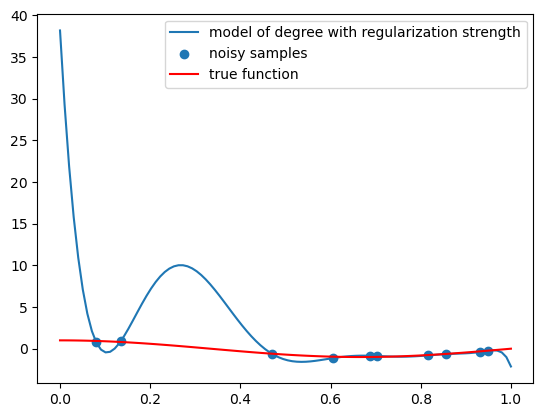

In [33]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

In [ ]:
polynomial_features = PolynomialFeatures(degree=16, include_bias=False)
ridge_regression = Ridge(alpha=1e-3)   
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                           ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=16, include_bias=False)),
                ('ridge_regression', Ridge(alpha=0.001))])

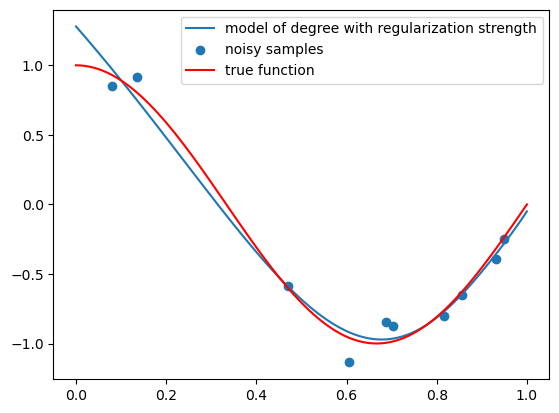

In [35]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

In [36]:
polynomial_features = PolynomialFeatures(degree=16, include_bias=False)
ridge_regression = Ridge(alpha=1e-2)   # ← change to 0, 1e-3, 1e-2, then 1 and re-run
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                           ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=16, include_bias=False)),
                ('ridge_regression', Ridge(alpha=0.01))])

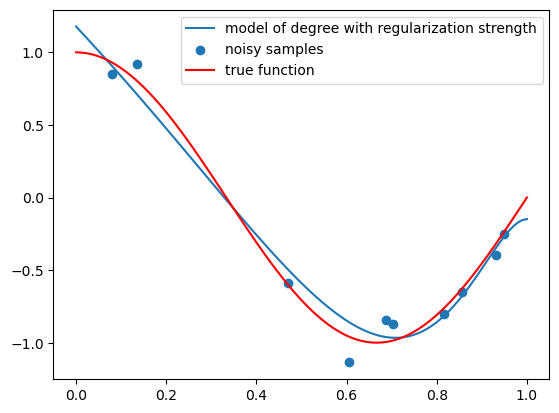

In [37]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

In [38]:
polynomial_features = PolynomialFeatures(degree=16, include_bias=False)
ridge_regression = Ridge(alpha=1)   
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                           ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=16, include_bias=False)),
                ('ridge_regression', Ridge(alpha=1))])

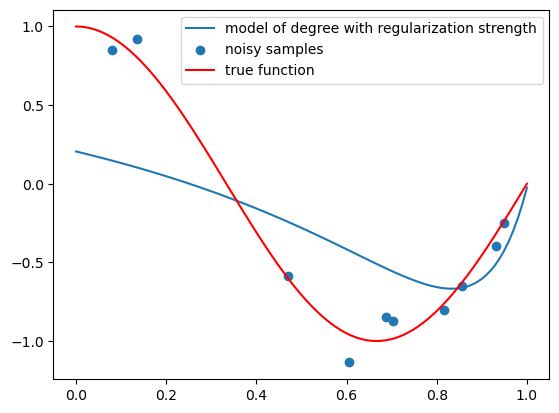

In [39]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()


### **Graph 5 – Polynomial Regression of Degree 16 with Ridge Regularization**

The fifth graph keeps the polynomial degree at 16 but introduces **ridge regularization**, which penalizes large coefficient magnitudes through the term ($\lambda$ $\|w\|^2$). The goal is to reduce the wild oscillations observed previously by shrinking the coefficients toward zero. The resulting blue curve still deviates significantly, indicating that the chosen regularization parameter (α) is likely too small. Nonetheless, the curve is a first step toward stabilization: ridge regression discourages extreme weights and gradually smooths the function as α increases. If we were to repeat this experiment with α = 1e-3, 1e-2, and 1, we would observe a clear progression, from the nearly explosive oscillations of α = 0 to a gently smoothed, well-behaved curve at α = 1e-2, and finally to a slightly underfit line at α = 1. The underlying mechanism is that the ridge penalty balances the trade-off between bias and variance: stronger regularization introduces more bias but drastically lowers variance, leading to better generalization.

The residual instability in this graph also stems from numerical scaling issues. Without standardizing polynomial features, the higher-order terms (like ($x^{16}$)) take very large or very small values compared to the lower-order ones, which can destabilize the linear algebra computations. Using a `StandardScaler` before the ridge regression step typically solves this, producing a smoother and more realistic fit.

**Overall Interpretation**

Across these five figures, we can clearly trace the **bias–variance trade-off** in polynomial regression. The degree-1 model suffers from high bias (too simple); the degree-2 model offers a balanced compromise; the degree-16 unregularized model suffers from extreme variance; and the degree-16 ridge-regularized model illustrates how regularization reins in variance at the cost of some bias. These plots collectively illustrate why model complexity and regularization must be tuned carefully ; not just to fit the training data, but to generalize well to unseen points.


#### 2.16 What do you observe if you change the number of samples from the function?

When the number of samples is increased in a polynomial regression experiment, the fitted curve becomes smoother and more stable. With only a few data points, especially when using a high-degree polynomial such as degree 16, the model tends to overfit by oscillating sharply to pass through or near every noisy point. This behavior reflects **high variance**, meaning the model is very sensitive to small fluctuations in the data. As more samples are added, the variance decreases, and the model begins to approximate the underlying function more faithfully, producing a steadier fit.

From a **bias–variance perspective**, small sample sizes combined with complex models result in high variance and poor generalization, whereas larger datasets reduce variance and help the model achieve a better balance between bias and variance. In terms of training and test performance, models trained on small datasets often exhibit very low training error but high test error. As the sample size grows, training error increases slightly, while test error decreases, and the two curves converge, therefore indicating improved generalization.

**Regularization**, such as Ridge regression, helps control this overfitting by shrinking the model coefficients. This effect is particularly valuable when the number of samples is small and the model is prone to large oscillations. As the dataset becomes larger, the need for strong regularization diminishes because the data itself provides more stability.

Finally, high-degree polynomial models can suffer from **numerical instability**, as their design matrices become ill-conditioned. Increasing the number of samples and applying regularization both improve numerical conditioning, leading to more reliable and consistent predictions. Overall, increasing the sample size reduces variance, stabilizes the fit, and enhances the generalization ability of polynomial regression models.


### 2.17 Why do we need a test set in machine learning?

A **test set** is needed in machine learning to **evaluate how well a trained model generalizes** to new, unseen data.

***Purpose of the Test Set***

The test set is a **separate portion of the dataset** that is **not used during training**. After a model is trained on the **training set**, it is tested on this unseen data to measure its **performance and generalization ability**.

***Why It’s Important***

* **Avoids overfitting:**
  A model might learn the patterns—and even the noise—of the training data too well. It may perform perfectly on the training set but fail on new data. The test set helps detect this overfitting.

* **Estimates real-world performance:**
  The test set simulates how the model will behave on data it has never seen before, giving a realistic estimate of its accuracy, error, or other performance metrics.

* **Guides model selection and improvement:**
  Comparing test performance across different models or hyperparameters helps you choose the one that generalizes best rather than just memorizing training data.

***Typical Workflow***

* **Training set:** Used to fit the model’s parameters.
* **Validation set (optional):** Used to tune hyperparameters (in cross-validation).
* **Test set:** Used *only once* at the end to evaluate final performance.

***In summary***

> We need a test set to objectively measure how well a machine learning model performs on unseen data.
> It ensures that the model is not just memorizing the training examples but truly learning patterns that generalize to new situations.

### 2.18 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters?


In machine learning, the dataset is typically divided into three distinct parts: the **training set**, the **validation set**, and the **test set**. Each serves a specific purpose in building and evaluating predictive models.

The **training set** is used to fit the model’s internal parameters, such as the weights or coefficients that minimize the training error. The **validation set** is then used to tune the model’s **hyperparameters**, which are settings that control aspects of the learning process or model complexity. Examples include the regularization strength in Ridge regression, the number of neighbors in a k-NN model, or the degree of a polynomial in polynomial regression.

It is important to note that the **test set must never be used for hyperparameter tuning**. The test set’s role is to provide an **unbiased evaluation** of the final model’s performance on unseen data. If the test set is used during model selection or hyperparameter optimization, the model indirectly “learns” from this data, leading to **information leakage**. As a result, the reported performance would no longer reflect true generalization ability and would likely appear overly optimistic.

To avoid this, hyperparameter optimization should be performed exclusively using the validation set, or through techniques such as **cross-validation**, which estimate model performance more robustly without exposing the test data. Only after the best hyperparameters are selected should the final model be retrained on the combined training and validation data and then evaluated on the test set once.

In summary, the test set is reserved strictly for **final evaluation**. It acts as a proxy for future, unseen data and ensures that the reported performance of the model accurately reflects its generalization capability, free from any tuning bias.